In [721]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [722]:
df = pd.read_csv("British Dataset.csv")

In [723]:
df.head()

,AirName,AircraftModel,Comments,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating
0,British Airways,NaN,NaN,August 2024,0,0,1,1.0,NaN,5th August 2024,"""missed my connecting flight""",(United States),Rome to Philadelphia via London,3,Economy Class,3,Solo Leisure,1,1
1,British Airways,NaN,NaN,August 2024,0,1,1,1.0,NaN,3rd August 2024,“time to change leadership team”,(United States),London to Bologna,3,Economy Class,1,Business,1,0
2,British Airways,A380,NaN,August 2024,2,3,1,1.0,NaN,2nd August 2024,"""avoid it at all cost!""",(United States),Sydney to London,1,Business Class,3,Business,1,1
3,British Airways,A320,NaN,August 2024,0,4,5,10.0,yes,2nd August 2024,“Great customer service from BA”,(United States),Dublin to London Heathrow,3,Business Class,5,Solo Leisure,4,0
4,British Airways,NaN,NaN,July 2024,0,0,1,1.0,NaN,30th July 2024,"""Absolute worst travel experience""",(United States),London to Los Angeles via Paris CDG,1,Economy Class,1,Couple Leisure,1,0


In [724]:
df.shape

(3842, 19)

In [725]:
df['Comments'].value_counts()

Series([], Name: count, dtype: int64)

In [726]:
df['Recommended'].value_counts()

Recommended
yes    1533
Name: count, dtype: int64

In [727]:
df.isna().sum()

AirName                   0
AircraftModel          1841
Comments               3842
DateFlown               778
EntertainmentRating       0
FoodRating                0
GroundServiceRating       0
OverallScore              5
Recommended            2309
ReviewDate                0
ReviewTitle               0
ReviewrCountry            0
Route                   775
SeatComfortRating         0
SeatType                  2
ServiceRating             0
TravelType              771
ValueRating               0
WifiRating                0
dtype: int64

In [728]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print('Categorical columns:')
print(categorical_columns)

Categorical columns:
Index(['AirName', 'AircraftModel', 'DateFlown', 'Recommended', 'ReviewDate',
       'ReviewTitle', 'ReviewrCountry', 'Route', 'SeatType', 'TravelType'],
      dtype='object')


In [729]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f'Value counts for {col}:')
    print(df[col].value_counts())
    print()


Value counts for AirName:
AirName
British Airways    3842
Name: count, dtype: int64

Value counts for AircraftModel:
AircraftModel
A320                   387
Boeing 777             284
Boeing 747-400         182
A380                   175
Boeing 777-200         128
                      ... 
Boeing 787-9, A380       1
A320 / Boeing 787-9      1
Airbus A32               1
A319 / Boeing 787-9      1
Airbus 319               1
Name: count, Length: 209, dtype: int64

Value counts for DateFlown:
DateFlown
August 2015       83
September 2015    78
November 2015     66
April 2017        65
October 2015      64
                  ..
November 2014      2
October 2014       1
June 2020          1
August 2014        1
July 2014          1
Name: count, Length: 121, dtype: int64

Value counts for Recommended:
Recommended
yes    1533
Name: count, dtype: int64

Value counts for ReviewDate:
ReviewDate
19th January 2015     26
20th November 2014    18
28th October 2014     14
6th September 2014    12
31

In [730]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print('Categorical columns:')
print(categorical_columns)


Categorical columns:
Index(['AirName', 'AircraftModel', 'DateFlown', 'Recommended', 'ReviewDate',
       'ReviewTitle', 'ReviewrCountry', 'Route', 'SeatType', 'TravelType'],
      dtype='object')


In [731]:
numerical_columns = df.select_dtypes(include=['number']).columns

print('Summary statistics for numerical columns:')
for col in numerical_columns:
    print(f'\nSummary statistics for {col}:')
    print(df[col].describe())

Summary statistics for numerical columns:

Summary statistics for Comments:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Comments, dtype: float64

Summary statistics for EntertainmentRating:
count    3842.000000
mean        1.806351
std         1.686426
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         5.000000
Name: EntertainmentRating, dtype: float64

Summary statistics for FoodRating:
count    3842.000000
mean        2.411765
std         1.599644
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: FoodRating, dtype: float64

Summary statistics for GroundServiceRating:
count    3842.000000
mean        2.153826
std         1.726864
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: GroundServiceRating, dtype: float64

Summary statistics for OverallScore:
coun

In [732]:
df['AircraftModel'].fillna('Unknown', inplace=True)
df['Comments'].fillna('', inplace=True)
df['Recommended'].fillna('No', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17720\811617070.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Comments'].fillna('', inplace=True)


In [733]:
df.head()

,AirName,AircraftModel,Comments,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewTitle,ReviewrCountry,Route,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating
0,British Airways,Unknown,,August 2024,0,0,1,1.0,No,5th August 2024,"""missed my connecting flight""",(United States),Rome to Philadelphia via London,3,Economy Class,3,Solo Leisure,1,1
1,British Airways,Unknown,,August 2024,0,1,1,1.0,No,3rd August 2024,“time to change leadership team”,(United States),London to Bologna,3,Economy Class,1,Business,1,0
2,British Airways,A380,,August 2024,2,3,1,1.0,No,2nd August 2024,"""avoid it at all cost!""",(United States),Sydney to London,1,Business Class,3,Business,1,1
3,British Airways,A320,,August 2024,0,4,5,10.0,yes,2nd August 2024,“Great customer service from BA”,(United States),Dublin to London Heathrow,3,Business Class,5,Solo Leisure,4,0
4,British Airways,Unknown,,July 2024,0,0,1,1.0,No,30th July 2024,"""Absolute worst travel experience""",(United States),London to Los Angeles via Paris CDG,1,Economy Class,1,Couple Leisure,1,0


In [734]:
print(df.describe)

<bound method NDFrame.describe of               AirName AircraftModel Comments    DateFlown  \
0     British Airways       Unknown           August 2024   
1     British Airways       Unknown           August 2024   
2     British Airways          A380           August 2024   
3     British Airways          A320           August 2024   
4     British Airways       Unknown             July 2024   
...               ...           ...      ...          ...   
3837  British Airways       Unknown                   NaN   
3838  British Airways       Unknown                   NaN   
3839  British Airways       Unknown                   NaN   
3840  British Airways       Unknown                   NaN   
3841  British Airways       Unknown                   NaN   

      EntertainmentRating  FoodRating  GroundServiceRating  OverallScore  \
0                       0           0                    1           1.0   
1                       0           1                    1           1.0   
2    

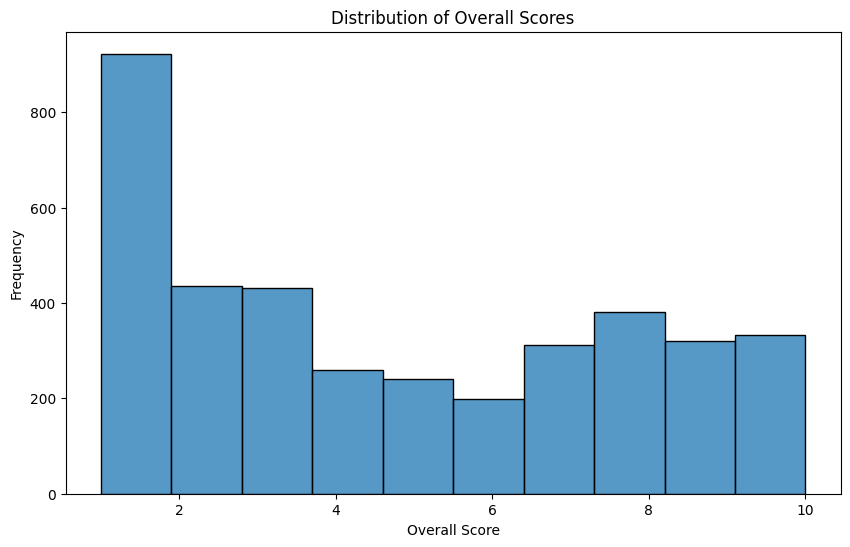

In [735]:
plt.figure(figsize=(10, 6))
sns.histplot(df['OverallScore'], bins=10)
plt.title('Distribution of Overall Scores')
plt.xlabel('Overall Score')
plt.ylabel('Frequency')
plt.show()

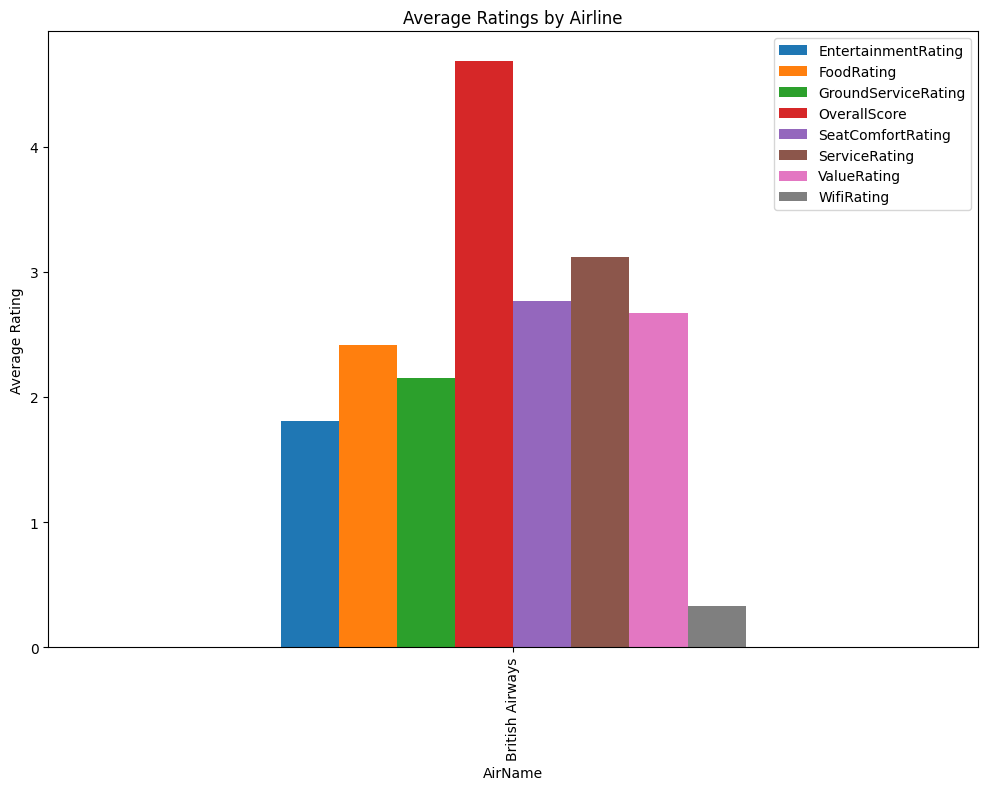

In [736]:
ratings_by_airline = df.groupby('AirName')[['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'OverallScore', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating']].mean()
ratings_by_airline.plot(kind='bar', figsize=(12, 8))
plt.title('Average Ratings by Airline')
plt.ylabel('Average Rating')
plt.show()

In [737]:
df.columns

Index(['AirName', 'AircraftModel', 'Comments', 'DateFlown',
       'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OverallScore', 'Recommended', 'ReviewDate', 'ReviewTitle',
       'ReviewrCountry', 'Route', 'SeatComfortRating', 'SeatType',
       'ServiceRating', 'TravelType', 'ValueRating', 'WifiRating'],
      dtype='object')

In [738]:
for col in ['AircraftModel', 'Recommended', 'ReviewrCountry', 'SeatType', 'TravelType']:
    print(f'{col} unique values:')
    print(df[col].unique())
    print()

AircraftModel unique values:
['Unknown' 'A380' 'A320' 'Boeing 777' 'A380-800' 'A350-1000' 'A320/A380'
 'Boeing 747' 'Boeing 787-9' 'A380 / Boeing 777-200ER' 'A319 / A320'
 'A350' 'A319 / E190' 'A340' 'Boeing 787' 'Boeing 777-200'
 'Boeing 787-8 /777-200 / A320-200' 'A321' 'Boeing 777-300'
 'Boeing 777-300ER' 'A319' 'Boeing 777 -200' 'A329' 'A320/Boeing 777'
 'Boeing 787-8' 'A321 neo' 'A320-232' 'BA366' '777-300 and A320' 'A320neo'
 'Embraer-190' 'A380 / A320' 'Embraer' 'E190' 'A320 A350' 'A320Neo'
 'A321neo' 'A321Neo' 'Embraer 190' 'Boeing 737' 'A320 Finnair'
 'Dreamliner' 'Boeing 787 / A320' 'Boeing 777 / A320' 'A320, A380'
 'Boeing 787-10' 'A320-200' 'A320, Boeing 787' 'A321 Neo' 'Boeing 737 800'
 'A320 / Boeing 777' 'Boeing 777-200ER' 'Boeing 787-900' 'A321-neo' 'A322'
 'Boeing 737-800' 'A320 Neo' 'A320NEO' 'A330' 'A230' 'A321NEO'
 'Embraer 195' 'Boeing 747-400' 'Boeing 777-200 / 747-400'
 'Boeing 777 - 200' 'Boeing 787-9, A320-200' 'EMB190' 'A319 / Boeing777'
 'A340-300, A320' 'A32

In [739]:
df['DateFlown'] = pd.to_datetime(df['DateFlown'], errors='coerce')
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'], errors='coerce')

df['AircraftModel'] = df['AircraftModel'].astype('category')
df['Recommended'] = df['Recommended'].astype('category')
df['ReviewrCountry'] = df['ReviewrCountry'].astype('category')
df['SeatType'] = df['SeatType'].astype('category')
df['TravelType'] = df['TravelType'].astype('category')

df.dropna(inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17720\652866159.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateFlown'] = pd.to_datetime(df['DateFlown'], errors='coerce')


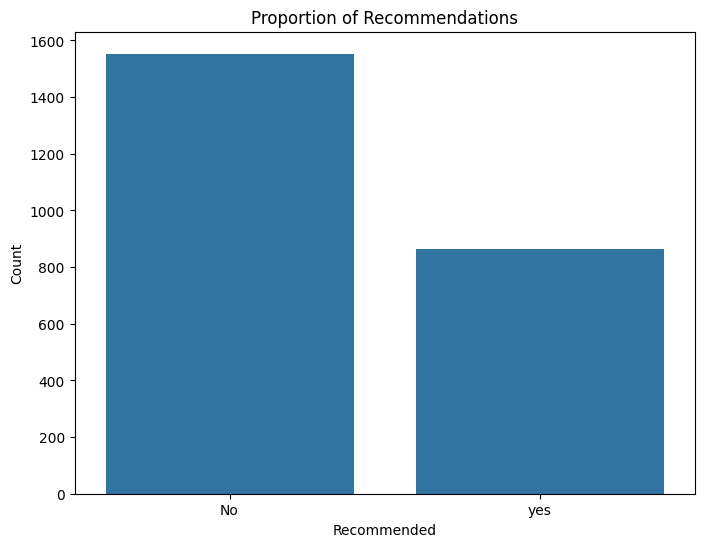

In [740]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Recommended', data=df)
plt.title('Proportion of Recommendations')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()


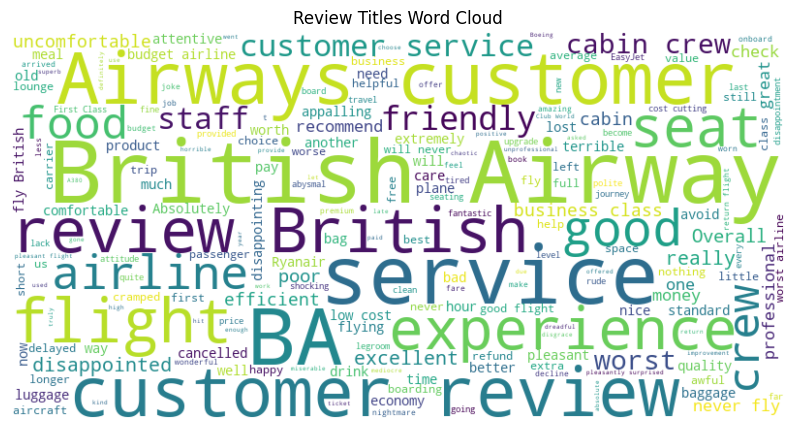

In [741]:
from wordcloud import WordCloud
text = ' '.join(title for title in df['ReviewTitle'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Review Titles Word Cloud')
plt.show()


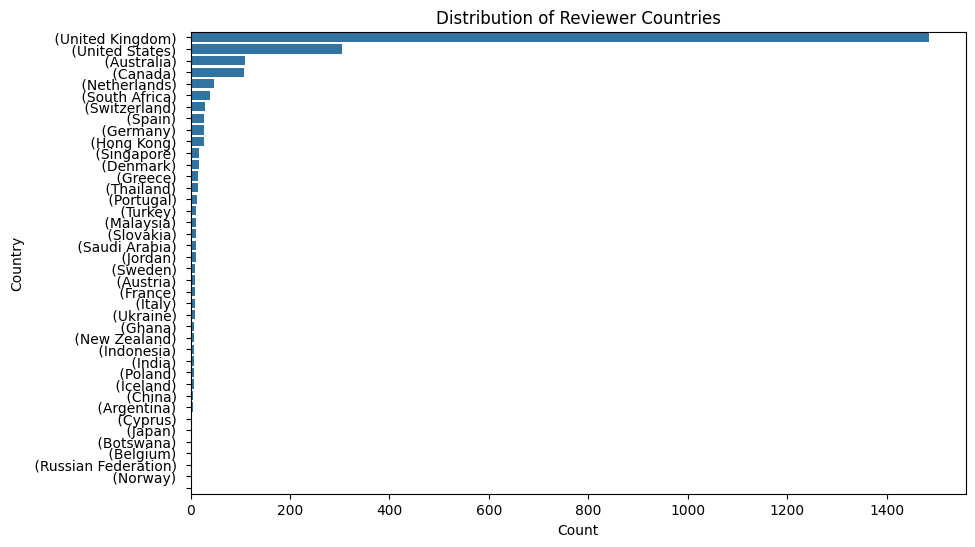

In [742]:
plt.figure(figsize=(10, 6))
sns.countplot(y='ReviewrCountry', data=df, order=df['ReviewrCountry'].value_counts().index)
plt.title('Distribution of Reviewer Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


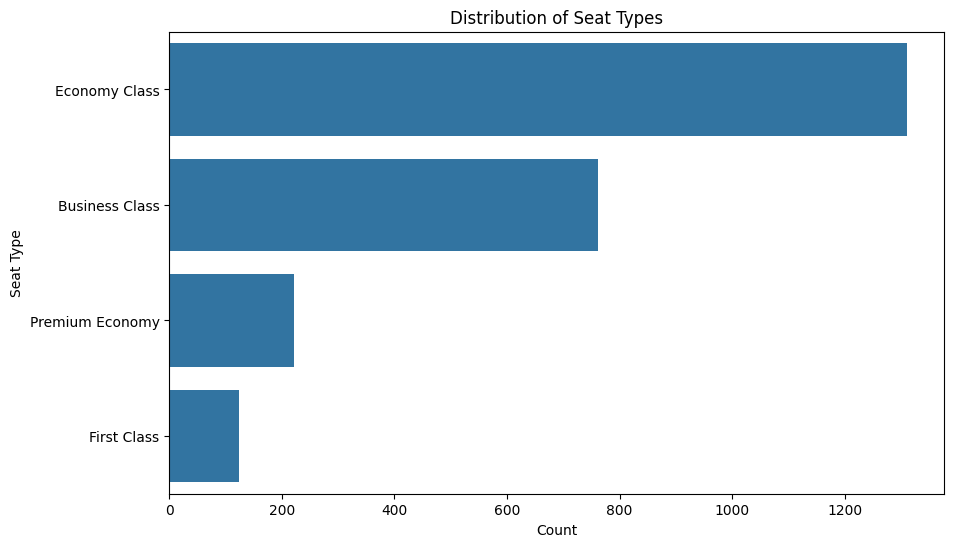

In [743]:
plt.figure(figsize=(10, 6))
sns.countplot(y='SeatType', data=df, order=df['SeatType'].value_counts().index)
plt.title('Distribution of Seat Types')
plt.xlabel('Count')
plt.ylabel('Seat Type')
plt.show()


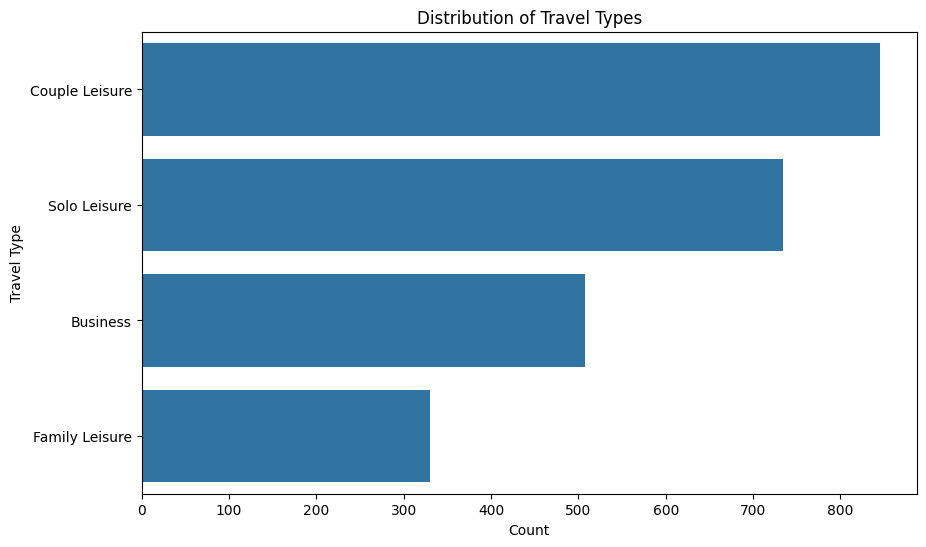

In [744]:
plt.figure(figsize=(10, 6))
sns.countplot(y='TravelType', data=df, order=df['TravelType'].value_counts().index)
plt.title('Distribution of Travel Types')
plt.xlabel('Count')
plt.ylabel('Travel Type')
plt.show()

In [745]:
df['AircraftModel'].value_counts()

AircraftModel
Unknown                      860
A320                         306
Boeing 777                   227
Boeing 747-400               138
A380                         133
                            ... 
Boeing 787-9 / A380-800        0
Boeing 747 and Boeing 777      0
A320/B788                      0
A340-300, A320                 0
B767 / A380                    0
Name: count, Length: 210, dtype: int64

In [746]:
df['ReviewTitle'].value_counts()

ReviewTitle
British Airways customer review                        151
"never fly British Airways again"                        6
"Overall a good flight"                                  5
"missed my connecting flight"                            4
"one of the worst airlines"                              4
                                                      ... 
"seat comfort has been sacrificed"                       1
"flight has improved my opinion on British Airways"      1
"Noisy cabin, tiny screens"                              1
"Thank you so much!"                                     1
"BA have improved both service"                          1
Name: count, Length: 2210, dtype: int64

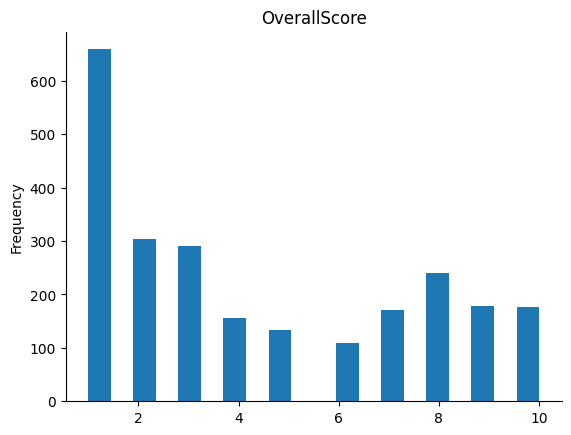

In [747]:
from matplotlib import pyplot as plt
df['OverallScore'].plot(kind='hist', bins=20, title='OverallScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

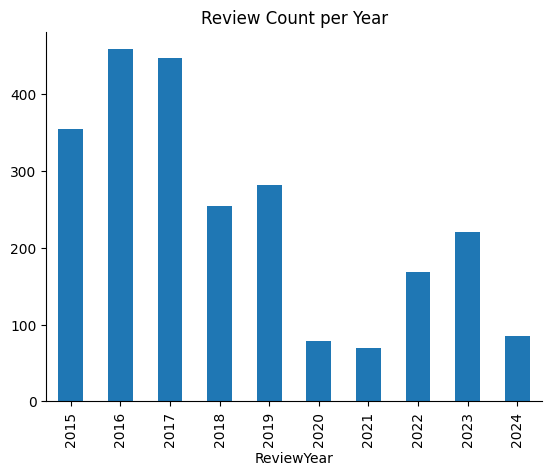

In [748]:
#review count per year
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])
df['ReviewYear'] = df['ReviewDate'].dt.year
review_count_per_year = df.groupby('ReviewYear').size()
review_count_per_year.plot(kind='bar', title='Review Count per Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [749]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [750]:
X = df.drop('OverallScore',axis=1)
y = df['OverallScore']

In [751]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [752]:
X_train.shape

(1450, 19)

In [753]:
import statsmodels.api as sm

In [754]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'OverallScore', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating']
Categorical variables: ['AirName', 'Comments', 'ReviewTitle', 'Route']


In [755]:
# Count the number of categorical and numerical variables
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 4
Number of numerical variables: 16


In [756]:
df.drop(columns=['AirName','Comments','ReviewTitle','Route'])

,AircraftModel,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,ReviewDate,ReviewrCountry,SeatComfortRating,SeatType,ServiceRating,TravelType,ValueRating,WifiRating,ReviewYear
0,Unknown,2024-08-01,0,0,1,1.0,No,2024-08-05,(United States),3,Economy Class,3,Solo Leisure,1,1,2024
4,Unknown,2024-07-01,0,0,1,1.0,No,2024-07-30,(United States),1,Economy Class,1,Couple Leisure,1,0,2024
5,Unknown,2024-07-01,3,3,1,3.0,No,2024-07-30,(United States),5,Business Class,1,Business,1,3,2024
6,Unknown,2024-07-01,0,1,1,1.0,No,2024-07-28,(United States),1,Economy Class,1,Family Leisure,1,0,2024
7,Boeing 777,2024-07-01,1,1,1,1.0,No,2024-07-19,(United States),1,Economy Class,1,Couple Leisure,1,0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,A321,2015-05-01,1,2,3,1.0,No,2015-06-12,(United Kingdom),1,Business Class,3,Business,1,1,2015
3071,B747,2015-05-01,2,4,0,8.0,yes,2015-06-12,(United Kingdom),3,Economy Class,5,Solo Leisure,4,0,2015
3072,777-300,2015-06-01,4,2,0,9.0,yes,2015-06-12,(United Kingdom),4,Business Class,5,Solo Leisure,5,0,2015
3073,A321,2015-06-01,0,3,0,9.0,yes,2015-06-12,(United Kingdom),4,Economy Class,5,Solo Leisure,4,0,2015


In [757]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming df is your DataFrame
# Separate features (X) and target variable (y)
X = df.drop('OverallScore', axis=1)
y = df['OverallScore']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values in categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Create a preprocessor that applies the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline that combines preprocessing with RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline
pipeline.fit(X, y)

# Access the RandomForestClassifier from the pipeline
rf_clf = pipeline.named_steps['classifier']

# Get transformed data
X_transformed = pipeline.named_steps['preprocessor'].transform(X)

# Extract feature importance scores
feature_importances = rf_clf.feature_importances_

# Select features with importance scores above a certain threshold
selector = SelectFromModel(rf_clf, threshold=0.05)
selector.fit(X_transformed, y)

# Get the indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of selected features
# Convert the one-hot encoded feature names
feature_names = (
    numeric_features.tolist() +
    pipeline.named_steps['preprocessor']
    .named_transformers_['cat']
    .named_steps['onehot']
    .get_feature_names_out(categorical_features).tolist()
)
selected_features_names = [feature_names[i] for i in selected_features_indices]

# Display selected features
print("Selected Features:")
print(selected_features_names)


Selected Features:
['GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating']


In [758]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_names], y, test_size=0.2, random_state=42)


In [759]:
# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1933, 4)
Shape of X_test: (484, 4)
Shape of y_train: (1933,)
Shape of y_test: (484,)


In [762]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Initialize instances of the chosen algorithms with default parameters
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Preprocess features if necessary (e.g., standardization for SVM or KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate each model using cross-validation
for name, model in models.items():
    print(f"Training {name}...")

    # Perform grid search for hyperparameter tuning
    if name in ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']:
        param_grid = {}  # Define hyperparameter grid for each model
        if name == 'Random Forest':
            param_grid = {'n_estimators': [100, 200, 300],
                          'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 5, 10]}
        elif name == 'Gradient Boosting':
            param_grid = {'n_estimators': [100, 200, 300],
                          'learning_rate': [0.01, 0.1, 0.5],
                          'max_depth': [3, 5, 7]}
        elif name == 'Logistic Regression':
            param_grid = {'C': [0.1, 1, 10],
                          'solver': ['liblinear', 'lbfgs'],
                          'penalty': ['l1', 'l2']}
        elif name == 'Support Vector Machine':
            param_grid = {'C': [0.1, 1, 10],
                          'kernel': ['linear', 'rbf', 'poly']}
        elif name == 'K-Nearest Neighbors':
            param_grid = {'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}

        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled if name != 'Logistic Regression' else X_train, y_train)

        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled if name != 'Logistic Regression' else X_test)
    else:
        model.fit(X_train_scaled if name != 'Logistic Regression' else X_train, y_train)
        y_pred = model.predict(X_test_scaled if name != 'Logistic Regression' else X_test)


Training Logistic Regression...


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Results for Logistic Regression:
Accuracy: 0.45041322314049587
Confusion Matrix:
[[115   0   6   0   0   0   0   0   0   0]
 [ 39   3  18   2   0   1   2   1   0   0]
 [ 36   0  27   1   1   1   6   0   1   0]
 [  8   0  15   0   4   1   7   0   0   0]
 [  4   0  14   4   3   1   5   2   0   0]
 [  0   0   5   0   2   0   8   0   1   0]
 [  0   0   1   0   0   0   7  14   1   0]
 [  0   0   0   1   0   0  12  32   2   4]
 [  0   0   0   0   0   0   2  13   4   9]
 [  1   0   1   0   0   0   1   3   5  27]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.57      0.95      0.71       121
         2.0       1.00      0.05      0.09        66
         3.0       0.31      0.37      0.34        73
         4.0       0.00      0.00      0.00        35
         5.0       0.30      0.09      0.14        33
         6.0       0.00      0.00      0.00        16
         7.0       0.14      0.30      0.19        23
         8.0       0.49      0.6

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Results for Gradient Boosting:
Accuracy: 0.4297520661157025
Confusion Matrix:
[[113   5   2   1   0   0   0   0   0   0]
 [ 39   9  13   0   1   1   2   1   0   0]
 [ 40   7  18   0   0   0   5   3   0   0]
 [ 10   8   5   0   2   0   9   1   0   0]
 [  8   1   8   0   2   0  11   3   0   0]
 [  1   0   4   0   2   0   8   1   0   0]
 [  0   0   0   0   0   0   5  16   2   0]
 [  0   0   0   0   0   5   7  31   5   3]
 [  0   0   0   0   0   1   1  16   5   5]
 [  0   0   1   0   0   0   2   6   4  25]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.54      0.93      0.68       121
         2.0       0.30      0.14      0.19        66
         3.0       0.35      0.25      0.29        73
         4.0       0.00      0.00      0.00        35
         5.0       0.29      0.06      0.10        33
         6.0       0.00      0.00      0.00        16
         7.0       0.10      0.22      0.14        23
         8.0       0.40      0.61  

In [767]:

    # Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of {name}: {accuracy:.2f}")

    # Print classification report and confusion matrix
print(f"Classification Report of {name}:")
print(classification_report(y_test, y_pred))
print(f"Confusion Matrix of {name}:")
print(confusion_matrix(y_test, y_pred))
print()

Accuracy of K-Nearest Neighbors: 0.40
Classification Report of K-Nearest Neighbors:
              precision    recall  f1-score   support

         1.0       0.56      0.77      0.65       121
         2.0       0.21      0.17      0.18        66
         3.0       0.35      0.23      0.28        73
         4.0       0.27      0.17      0.21        35
         5.0       0.24      0.27      0.26        33
         6.0       0.14      0.12      0.13        16
         7.0       0.14      0.22      0.17        23
         8.0       0.42      0.43      0.43        51
         9.0       0.26      0.21      0.24        28
        10.0       0.75      0.63      0.69        38

    accuracy                           0.40       484
   macro avg       0.33      0.32      0.32       484
weighted avg       0.39      0.40      0.39       484

Confusion Matrix of K-Nearest Neighbors:
[[93 18  8  0  1  0  1  0  0  0]
 [35 11 11  4  2  0  3  0  0  0]
 [25 12 17  7  6  0  5  0  0  1]
 [ 7  5  2  6  8 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17720\1118154918.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


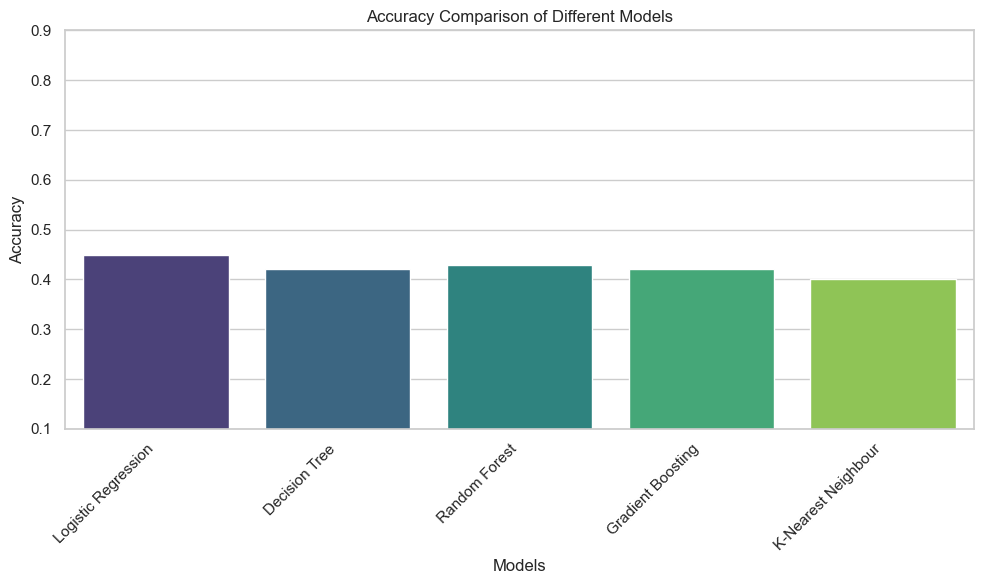

In [773]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and their performance metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbour']
accuracies = [0.45, 0.42, 0.43, 0.42, 0.40]

# Create a bar plot to visualize the accuracies of different models
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.1, 0.9)  # Set the y-axis limit for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [783]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Initialize the Gradient Boosting classifier
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [787]:

# Predictions on the test set
y_pred_lr = log_reg.predict(X_test)

# Evaluate model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Gradient Boosting:", accuracy_lr)


Accuracy of Gradient Boosting: 0.45867768595041325


In [788]:
# Classification report
print("Classification Report of Logistic Regression")
print(classification_report(y_test, y_pred_lr))


Classification Report of Logistic Regression
              precision    recall  f1-score   support

         1.0       0.57      0.95      0.71       121
         2.0       1.00      0.03      0.06        66
         3.0       0.32      0.42      0.36        73
         4.0       0.22      0.06      0.09        35
         5.0       0.00      0.00      0.00        33
         6.0       0.00      0.00      0.00        16
         7.0       0.14      0.30      0.19        23
         8.0       0.51      0.67      0.58        51
         9.0       0.29      0.14      0.19        28
        10.0       0.68      0.71      0.69        38

    accuracy                           0.46       484
   macro avg       0.37      0.33      0.29       484
weighted avg       0.47      0.46      0.38       484



In [789]:
# Confusion matrix
print("Confusion Matrix of Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_lr))


Confusion Matrix of Gradient Boosting:
[[115   0   6   0   0   0   0   0   0   0]
 [ 39   2  19   2   0   0   3   1   0   0]
 [ 35   0  31   1   0   1   4   0   1   0]
 [  8   0  17   2   1   0   7   0   0   0]
 [  4   0  18   2   0   0   7   2   0   0]
 [  0   0   5   1   1   0   8   0   1   0]
 [  0   0   1   0   0   0   7  14   1   0]
 [  0   0   0   1   0   0  10  34   2   4]
 [  0   0   0   0   0   0   2  13   4   9]
 [  1   0   1   0   0   0   1   3   5  27]]


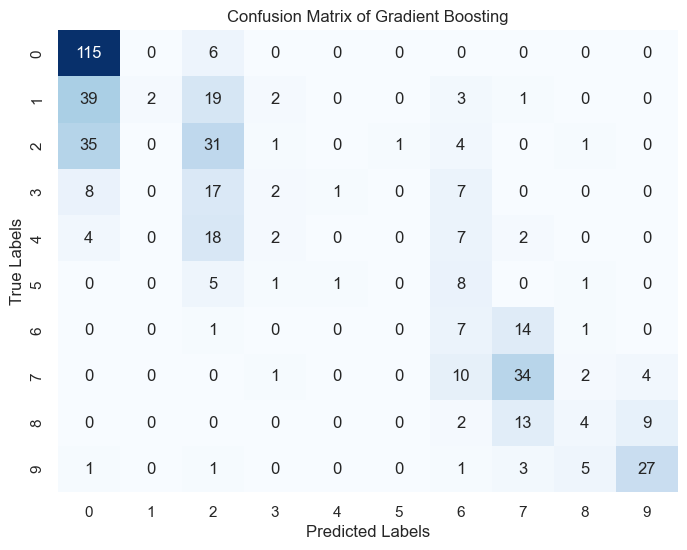

In [790]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Gradient Boosting')
plt.show()